# DS 2500: Data Wrangling<br>Final Project

May 4, 2022

Student: Alexander Shahramanyan<br>
Instructor: Dr. Marina Kogan

# Introduction
Education plays an essential role in the development of a person, and it is well known that educated people get higher salaries and have better living standards. Even though literacy rates have significantly increased over the last decades, there still are countries with quite low literacy rates. In this project, I will try to find what factors (related to wealth and population distribution) can cause the literacy rate to be higher or lower.

# Questions

**GDP and Literacy Rate**
- Are people in rich/developed countries more literate/educated?

*Related to the main question:*<br>

**GDP and Population Distribution**
- Are there more young people in poor/developing countries?

**GDP and Population Growth**
- Is population growth smaller in rich/developed countries?

## Initial Hypothesis
My initial hypothesis is that underdeveloped countries have lower literacy rates, which is mainly caused by poor organization of the education sector, which in turn is a result of insufficient resources. However, I would also like to find some other factors that also have some effect on the literacy rate. In this project, I will test the claim that population distribution (by age) and population growth also affect lower literacy rates. I also think that population growth can also be affected by the GDP of the country, i.e., how wealthy the country is.

# Dataset Description
Retrieved from World Bank's *World Development Indicators* database.<br>

**Indicators**:
* Annual GDP per capita
* Annual population data
 - distribution by gender and age
 - population growth data
* Annual literacy rate

**Years**: 1960-2020

**Countries**: 217

**Groups by Income Level**: 4 (low, lower-middle,
upper-middle, high)

# Setup

First, I import all the libraries I will need throughout the notebook and set the plotting parameters for better visualizations.

In [1]:
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Regression
import statsmodels.formula.api as smf
import statsmodels.api as sm

import itertools

# Plotting settings
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 11
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.family'] = 'serif'

Then I need to load the data.

In [2]:
# Load the data
df = pd.read_csv("data.csv")

## Dataset Check

In [3]:
# Check dataset shape
df.shape

(1302, 65)

In [4]:
# Check the top of the data
df.head()

Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                         Series Name        Series Code  \
0       Population ages 0-14 (% of total population)  SP.POP.0014.TO.ZS   
1      Population ages 15-64 (% of total population)  SP.POP.1564.TO.ZS   
2  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
3                       Population growth (annual %)        SP.POP.GROW   
4  Literacy rate, adult total (% of people ages 1...     SE.ADT.LITR.ZS   

  1960 [YR1960] 1961 [YR1961] 1962 [YR1962] 1963 [YR1963] 1964 [YR1964]  \
0   42.14085115   42.45394197   42.63735397   42.74880399    42.8547445   
1   55.06084102   54.73792752   54.55853274   54.46502511   54.39103249   
2   2.798307831   2.808130512   2.804113291   2.786170893   2.754223004   
3            ..   1.898498719   1.965804828   2.029830298   2.090207709   
4            ..            ..            ..            ..            ..   

  1965 [YR1965]  ... 2011 [YR2011] 2012 [YR2012] 2013 [YR2013] 2014 [YR2014]  \
0   42.98180452  ...   47.70159044   47.08975945   46.38667074   45.64058919   
1   54.30930304  ...   49.94394771    50.5239467    51.1931218   51.90783594   
2   2.708892442  ...   2.354461852   2.386293853   2.420207459   2.451574871   
3   2.147638846  ...   3.143105557   3.407600033   3.494591927   3.355602331   
4            ..  ...   31.44885063            ..            ..            ..   

  2015 [YR2015] 2016 [YR2016] 2017 [YR2017] 2018 [YR2018] 2019 [YR2019]  \
0   44.87703888   44.27211325     43.682526   43.09017551   42.47227139   
1   52.64429883    53.2079642   53.76322252   54.32489755    54.9119344   
2   2.478662289   2.519922544    2.55425147    2.58492694   2.615794214   
3   3.077053629   2.778034788    2.54783304   2.384309079   2.313073349   
4            ..            ..            ..            ..            ..   

  2020 [YR2020]  
0   41.82260145  
1   55.52832889  
2   2.649069652  
3   2.303812093  
4            ..  

[5 rows x 65 columns]

In [5]:
# Rename the year columns
old_year_cols = [col for col in df.columns if '[' in col]
year_cols = [col[:4] for col in old_year_cols]
df.rename(columns=dict(zip(old_year_cols, year_cols)), inplace=True)

In [6]:
# Check the top of the data
df.head()

Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                         Series Name        Series Code  \
0       Population ages 0-14 (% of total population)  SP.POP.0014.TO.ZS   
1      Population ages 15-64 (% of total population)  SP.POP.1564.TO.ZS   
2  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
3                       Population growth (annual %)        SP.POP.GROW   
4  Literacy rate, adult total (% of people ages 1...     SE.ADT.LITR.ZS   

          1960         1961         1962         1963         1964  \
0  42.14085115  42.45394197  42.63735397  42.74880399   42.8547445   
1  55.06084102  54.73792752  54.55853274  54.46502511  54.39103249   
2  2.798307831  2.808130512  2.804113291  2.786170893  2.754223004   
3           ..  1.898498719  1.965804828  2.029830298  2.090207709   
4           ..           ..           ..           ..           ..   

          1965  ...         2011         2012         2013         2014  \
0  42.98180452  ...  47.70159044  47.08975945  46.38667074  45.64058919   
1  54.30930304  ...  49.94394771   50.5239467   51.1931218  51.90783594   
2  2.708892442  ...  2.354461852  2.386293853  2.420207459  2.451574871   
3  2.147638846  ...  3.143105557  3.407600033  3.494591927  3.355602331   
4           ..  ...  31.44885063           ..           ..           ..   

          2015         2016         2017         2018         2019  \
0  44.87703888  44.27211325    43.682526  43.09017551  42.47227139   
1  52.64429883   53.2079642  53.76322252  54.32489755   54.9119344   
2  2.478662289  2.519922544   2.55425147   2.58492694  2.615794214   
3  3.077053629  2.778034788   2.54783304  2.384309079  2.313073349   
4           ..           ..           ..           ..           ..   

          2020  
0  41.82260145  
1  55.52832889  
2  2.649069652  
3  2.303812093  
4           ..  

[5 rows x 65 columns]

This looks much better. Also, for missing data, there are `..`s in the dataset. I will replace them with `NaN`s so that it is easier to find missing data.

In [7]:
# Replace .. with NaN
df[year_cols] = df[year_cols].replace("..", np.nan).astype('float')

In [8]:
# Check the top of the data
df.head()

Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                         Series Name        Series Code  \
0       Population ages 0-14 (% of total population)  SP.POP.0014.TO.ZS   
1      Population ages 15-64 (% of total population)  SP.POP.1564.TO.ZS   
2  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
3                       Population growth (annual %)        SP.POP.GROW   
4  Literacy rate, adult total (% of people ages 1...     SE.ADT.LITR.ZS   

        1960       1961       1962       1963       1964       1965  ...  \
0  42.140851  42.453942  42.637354  42.748804  42.854745  42.981805  ...   
1  55.060841  54.737928  54.558533  54.465025  54.391032  54.309303  ...   
2   2.798308   2.808131   2.804113   2.786171   2.754223   2.708892  ...   
3        NaN   1.898499   1.965805   2.029830   2.090208   2.147639  ...   
4        NaN        NaN        NaN        NaN        NaN        NaN  ...   

        2011       2012       2013       2014       2015       2016  \
0  47.701590  47.089759  46.386671  45.640589  44.877039  44.272113   
1  49.943948  50.523947  51.193122  51.907836  52.644299  53.207964   
2   2.354462   2.386294   2.420207   2.451575   2.478662   2.519923   
3   3.143106   3.407600   3.494592   3.355602   3.077054   2.778035   
4  31.448851        NaN        NaN        NaN        NaN        NaN   

        2017       2018       2019       2020  
0  43.682526  43.090176  42.472271  41.822601  
1  53.763223  54.324898  54.911934  55.528329  
2   2.554251   2.584927   2.615794   2.649070  
3   2.547833   2.384309   2.313073   2.303812  
4        NaN        NaN        NaN        NaN  

[5 rows x 65 columns]

Next, I will melt the dataset, so that it is easier to query specific data from it.

In [9]:
# Melt the dataset
df_melt = df.melt(["Series Name", "Series Code", "Country Name", "Country Code"], var_name="Year", value_name="Value")
df_melt.head()

Series Name        Series Code  \
0       Population ages 0-14 (% of total population)  SP.POP.0014.TO.ZS   
1      Population ages 15-64 (% of total population)  SP.POP.1564.TO.ZS   
2  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
3                       Population growth (annual %)        SP.POP.GROW   
4  Literacy rate, adult total (% of people ages 1...     SE.ADT.LITR.ZS   

  Country Name Country Code  Year      Value  
0  Afghanistan          AFG  1960  42.140851  
1  Afghanistan          AFG  1960  55.060841  
2  Afghanistan          AFG  1960   2.798308  
3  Afghanistan          AFG  1960        NaN  
4  Afghanistan          AFG  1960        NaN

Now that we have the data in a nice form, I will print all the unique variable names.

In [10]:
# Print all variables
df_melt["Series Name"].unique()

array(['Population ages 0-14 (% of total population)',
       'Population ages 15-64 (% of total population)',
       'Population ages 65 and above (% of total population)',
       'Population growth (annual %)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'GDP per capita (current US$)'], dtype=object)

# Literacy Rate vs GDP

## Literacy Rate on Map

There are a bunch of variables. But there is a lot of missing data as well. I will make a bar chart of the missing data for the `Literacy rate, adult total (% of people ages 15 and above)` variable.

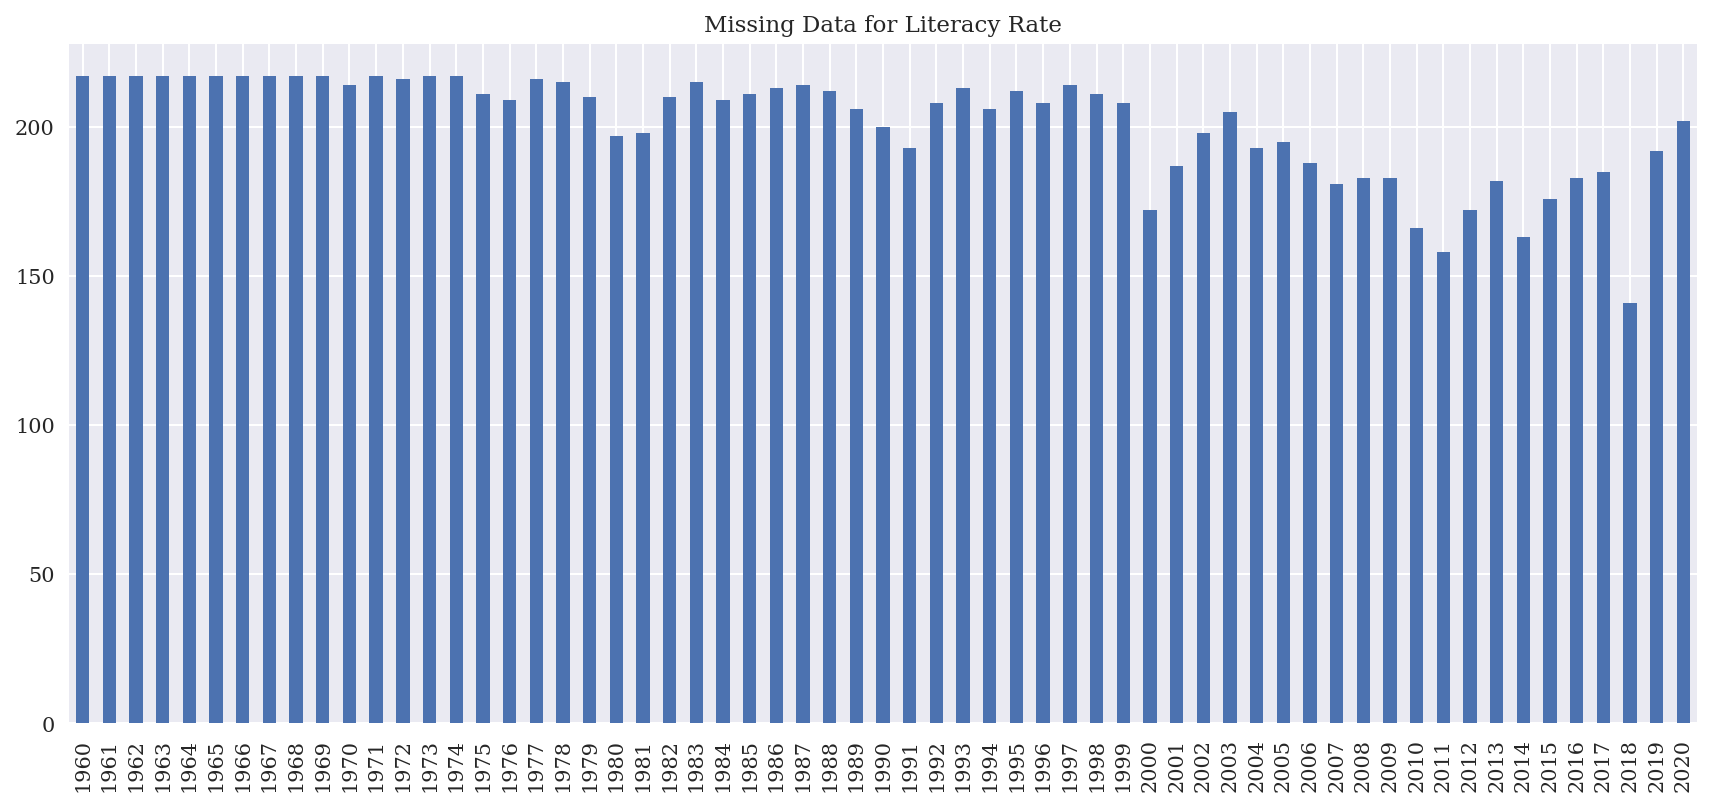

In [11]:
# Missing Literacy Rate data
df[df['Series Name'] == "Literacy rate, adult total (% of people ages 15 and above)"][year_cols].isnull().sum().plot(kind='bar')
plt.title('Missing Data for Literacy Rate')
plt.show()

This is a lot of missing data. If I combine a few years, I will have literacy rate data on more countries. So, I will do that: I will compute the mean literacy rate for the past 10 years for each country and use that as my variable. While 10 years is not a short period of time, I think the literacy rate should not have changed that much during this period. Anyway, I don't see any alternative way of using the data.

In [12]:
# Mean literacy rate of the past 10 years for each country 
df_literacy_mean = df_melt[(df_melt["Series Name"] == "Literacy rate, adult total (% of people ages 15 and above)") & (2010 <= df_melt["Year"].astype("int"))].groupby("Country Name").agg(np.mean).dropna().reset_index().rename(columns={"Value":"Literacy Rate"})

In [13]:
# Check the data shape
df_literacy_mean.shape

(152, 2)

We have literacy rate data of 152 countries. This seems to be sufficient.

In [14]:
# Check the top of the data
df_literacy_mean.head()

Country Name  Literacy Rate
0          Afghanistan      31.448851
1              Albania      97.411140
2              Algeria      81.407837
3               Angola      66.030113
4  Antigua and Barbuda      98.949997

Now that we have the literacy data, I will make a choropleth map to understand the overall trends in literacy rates.

In [15]:
# Choropleth map for Literacy Rate data
fig = px.choropleth(df_literacy_mean, locations='Country Name', locationmode='country names', color='Literacy Rate',\
                    range_color=(0, 100), scope='world', hover_name="Country Name",\
                    color_continuous_scale=px.colors.sequential.Plasma,\
                    title="Literacy Rate")
 
fig.show()

It looks like the countries in Africa and South Asia have the lowest literacy rates. Sadly, this was expected. Anyway, now, I will do the same with the GDP per capita.

## GDP on Map

Similarly, I will make a bar chart of the missing data for the `GDP per capita (current US$)` variable.

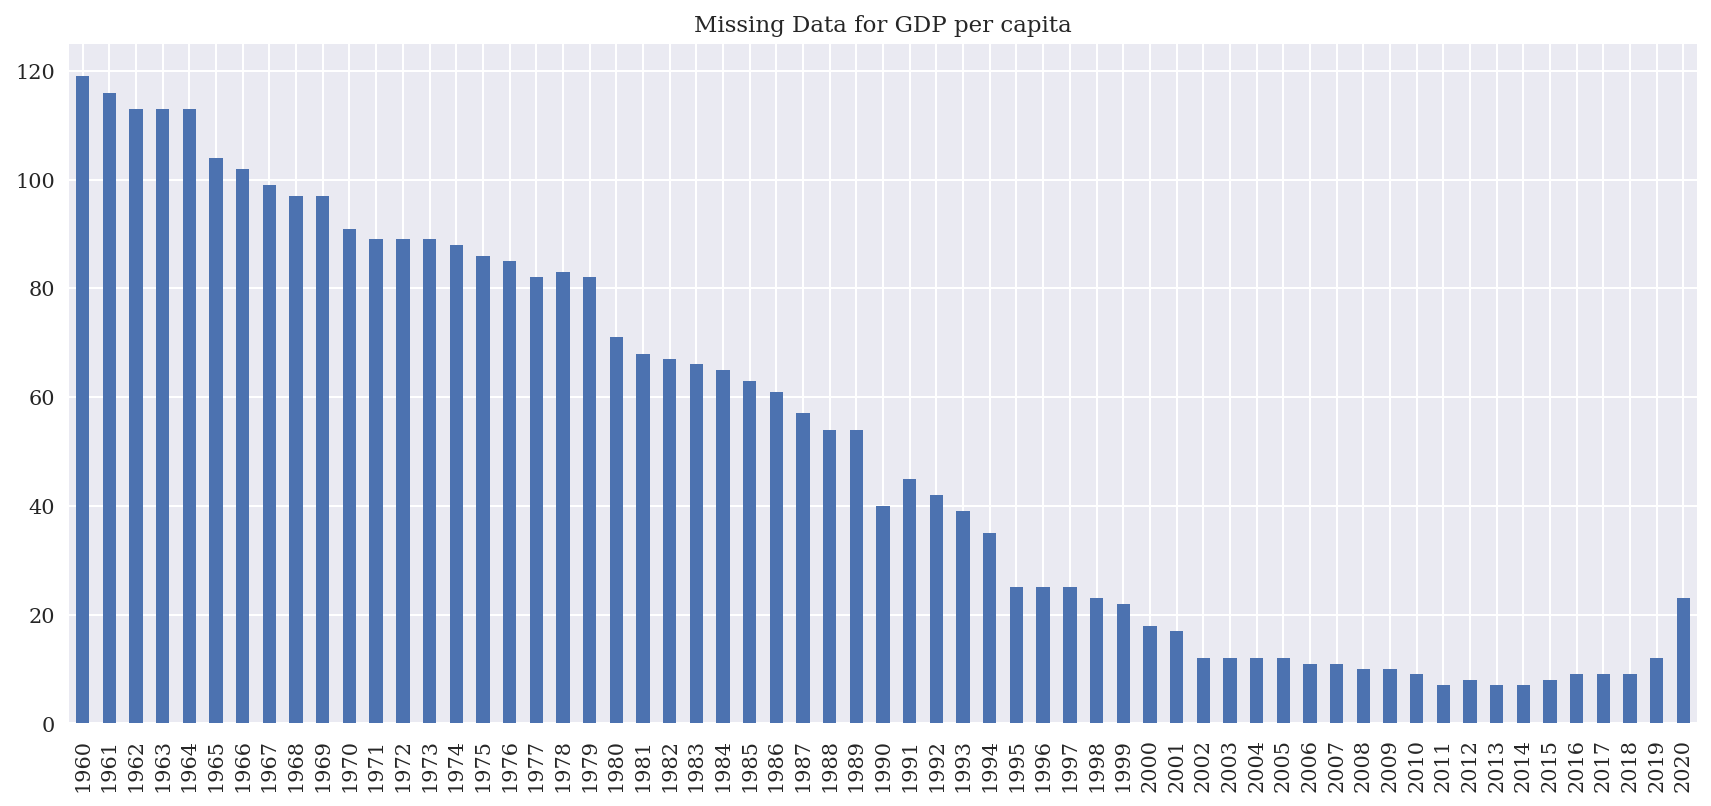

In [16]:
# Missing GDP per capita data
df[df['Series Name'] == "GDP per capita (current US$)"][year_cols].isnull().sum().plot(kind='bar')
plt.title('Missing Data for GDP per capita')
plt.show()

The situation with missing data here is not as bad as with the literacy rates. Nonetheless, I will take the mean GDP per capita for 2 years, since the 2020 data has a bunch of missing data.

In [17]:
# Mean literacy rate of the past 2 years for each country 
df_gdp_pc_mean = df_melt[(df_melt["Series Name"] == "GDP per capita (current US$)") & (2019 <= df_melt["Year"].astype("int"))].groupby("Country Name").agg(np.mean).dropna().reset_index().rename(columns={"Value":"GDP per capita"})

In [18]:
# Check the data shape
df_gdp_pc_mean.shape

(205, 2)

There is GDP per capita data for 205 countries, which seems to be sufficient.

In [19]:
# Check the top of the data
df_gdp_pc_mean.head()

Country Name  GDP per capita
0     Afghanistan      505.463610
1         Albania     5320.975919
2         Algeria     3648.263242
3  American Samoa    12280.130565
4         Andorra    40897.330870

In [20]:
# Choropleth map for GDP per capita data
fig = px.choropleth(df_gdp_pc_mean, locations='Country Name', locationmode='country names', color='GDP per capita',\
                    range_color=(0, 70000), scope='world', hover_name="Country Name",\
                    color_continuous_scale=px.colors.sequential.RdBu,\
                    title="GDP per Capita")
 
fig.show()

This looks similar to the literacy rate map. Again, countries in Africa and South Asia have the lowest GDP per capita. Here, I start thinking that the assumption I will be testing will probably be true.

## Correlation

Now, I will merge the literacy rate dataframe with the GDP per capita dataframe on `Country Name` to further analyze if the two variables are correlated.

In [21]:
# Merge the two dataframes
df_merged = df_literacy_mean.merge(df_gdp_pc_mean, on="Country Name")

In [22]:
# Check the top of the data
df_merged.head()

Country Name  Literacy Rate  GDP per capita
0          Afghanistan      31.448851      505.463610
1              Albania      97.411140     5320.975919
2              Algeria      81.407837     3648.263242
3               Angola      66.030113     2292.896478
4  Antigua and Barbuda      98.949997    15684.697080

In [23]:
# Check the shape of the data
df_merged.shape

(148, 3)

We have both literacy rate and GDP per capita data for 148 countries. Now I will make a scatter plot to see if there can be a correlation between the two variables.

In [24]:
# Scatterplot: Literacy Rate vs GDP per Capita
fig = px.scatter(df_merged, x="GDP per capita", y="Literacy Rate",
                 title="Literacy Rate vs GDP per Capita",
                 hover_data=['Country Name'])
fig.show()

I think there is a trend, however, because of the countries with very high GDP per capita, we can't clearly see it. So I will make another scatterplot and include only the countries that have a GDP per capita of less than $15,000.

In [25]:
# Scatterplot: Literacy Rate vs GDP per Capita
fig = px.scatter(df_merged[df_merged['GDP per capita'] < 15000], x="GDP per capita", y="Literacy Rate",
                 title="Literacy Rate vs GDP per Capita",
                 hover_data=['Country Name'])
fig.show()

Now, the relationship can clearly be seen: the higher the GDP per capita, the higher the literacy rate. Even though the relationship is not linear, I will fit a linear trendline and then a logarithmic one. According to the R-squared values, we will know which one fits best.

In [26]:
# Linear trendline
fig = px.scatter(df_merged[df_merged['GDP per capita'] < 15000], x="GDP per capita", y="Literacy Rate",
                 title="Literacy Rate vs GDP per Capita: Linear trendline",
                 hover_data=['Country Name'],
                 trendline="ols",
                 trendline_color_override='red')
fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     83.94
Date:                Sun, 01 May 2022   Prob (F-statistic):           1.70e-15
Time:                        21:31:49   Log-Likelihood:                -505.47
No. Observations:                 122   AIC:                             1015.
Df Residuals:                     120   BIC:                             1021.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.2452      2.176     29.986      0.000      60.937      69.553
x1             0.0035      0.000      9.162      0.000       0.003       0.004
==============================================================================
Omnibus:                        7.049   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                6.997
Skew:                          -0.585   Prob(JB):                       0.0302
Kurtosis:                       3.073   Cond. No.                     8.97e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The linear trendline does not seem to be that good. R-Squared is 0.41. Now, I will plot a logarithmic trendline, since visually the relationship between the variables seem to be logarithmic.

In [27]:
# Logarithmic trendline
fig = px.scatter(df_merged[df_merged['GDP per capita'] < 15000], x="GDP per capita", y="Literacy Rate",
                 title="Literacy Rate vs GDP per Capita: Logarithmic trendline",
                 hover_data=['Country Name'],
                 trendline="ols", trendline_options=dict(log_x=True),
                 trendline_color_override='red')
fig.show()

results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     170.5
Date:                Sun, 01 May 2022   Prob (F-statistic):           8.64e-25
Time:                        21:31:49   Log-Likelihood:                -483.88
No. Observations:                 122   AIC:                             971.8
Df Residuals:                     120   BIC:                             977.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -44.0541      9.615     -4.582      0.000     -63.091     -25.017
x1            35.9352      2.752     13.058      0.000      30.486      41.384
==============================================================================
Omnibus:                        1.638   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.183
Skew:                          -0.089   Prob(JB):                        0.553
Kurtosis:                       3.448   Cond. No.                         31.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

While this trendline is not quite good either, it is better than the linear one since the R-Squared here is greater (0.59). So we can assume that the relationship is close to logarithmic.

## Intermediate conclusion

To sum this part up, I think that the relationship is logarithmic because there are so-called outlier countries, with significantly higher GDP than the rest. Also, there is some kind of GDP threshold and countries that have a GDP higher than that tend to have quite a high GDP. That is, developing (middle-income) countries are able to provide their citizens with primary education. The difference between developing and developed countries is definitely the quality of education and the availability of academic opportunities.

Furthermore, my initial assumption that countries with higher GDP per capita have higher literacy rates is supported by the result of the analysis. Indeed, educating the population requires a huge amount of money and other resources. This makes it harder for poor/underdeveloped countries to provide education to their citizens. As a result, people are deprived of their right to education, which, however, in underdeveloped countries is not as critical compared to the issues with food, water, and living conditions.


# Population Distribution vs GDP

Now, I will try to see whether there are more young people in poor/developing countries compared to rich/developed countries. Firstly, I will make a choropleth map with children proportions (ages 0-14) for 1960 and 2020 to understand the overall trends.

In [28]:
# Choropleth map for Children proportion data

for year in [1960, 2020]:
    # Children proportions
    df_children_prop = df_melt[(df_melt["Series Name"] == "Population ages 0-14 (% of total population)") & (df_melt["Year"].astype("int") == year)][["Country Name", "Value"]].rename(columns={"Value":"Children Proportion"})

    fig = px.choropleth(df_children_prop, locations='Country Name', locationmode='country names', color='Children Proportion',\
                        scope='world', hover_name="Country Name",\
                        color_continuous_scale=px.colors.sequential.Plasma,\
                        title=f"Children Proportion (ages 0-14): {year}")

    fig.show()

We see that the children proportion has overall decreased over time. Currently, it is low in the developed regions, such as Europe and North America, and high in the poor/developing countries such as Africa and South Asia. Next, I will load the aggregated population data on 4 income groups: low income, lower-middle income, upper-middle income, and high income. These income groups are defined as follows:
- **Low-income economies** are those in which 2020 GNI per capita was \\$1,045 or less.
- **Lower-middle-income economies** are those in which 2020 GNI per capita was between \\$1,046 and \\$4,095.
- **Upper-middle-income economies** are those in which 2020 GNI per capita was between \\$4,096 and \\$12,695.
- **High-income economies** are those in which 2020 GNI per capita was \\$12,696 or more.

The data will be in the same form as before, so the cleaning will be the same.
 



In [29]:
# Load data
df_i = pd.read_csv("data_income.csv")

In [30]:
# Rename the year columns
old_year_cols = [col for col in df_i.columns if '[' in col]
year_cols = [col[:4] for col in old_year_cols]
df_i.rename(columns=dict(zip(old_year_cols, year_cols)), inplace=True)

In [31]:
# Replace .. with NaN
df_i[year_cols] = df_i[year_cols].replace("..", np.nan).astype('float')

Population data should not have any missing data, however, I'll recheck.

In [32]:
# Missing data
for series in df_i['Series Name'].unique():
    print(f"{series:<65}: {df_i[df_i['Series Name'] == series][year_cols].isnull().sum().sum()} missing values")

Population ages 00-04, female (% of female population)           : 0 missing values
Population ages 00-04, male (% of male population)               : 0 missing values
Population ages 0-14 (% of total population)                     : 0 missing values
Population ages 05-09, female (% of female population)           : 0 missing values
Population ages 05-09, male (% of male population)               : 0 missing values
Population ages 10-14, female (% of female population)           : 0 missing values
Population ages 10-14, male (% of male population)               : 0 missing values
Population ages 15-19, female (% of female population)           : 0 missing values
Population ages 15-19, male (% of male population)               : 0 missing values
Population ages 15-64 (% of total population)                    : 0 missing values
Population ages 20-24, female (% of female population)           : 0 missing values
Population ages 20-24, male (% of male population)               : 0 missing

As expected, no missing data. Now, I melt the dataset as before, so that it is easier to query certain data from it.

In [33]:
# Melt the data
df_i = df_i.melt(["Series Name", "Series Code", "Country Name", "Country Code"], var_name="Year", value_name="Value")

In [34]:
# Change Value data type
df_i["Value"] = df_i["Value"].astype("float")

The first visualization will be pie charts, which will show the population distribution by age for the income groups for different years. I will plot for four different years: 1960, 1980, 2000, and 2020. We will be able to see the main trend.

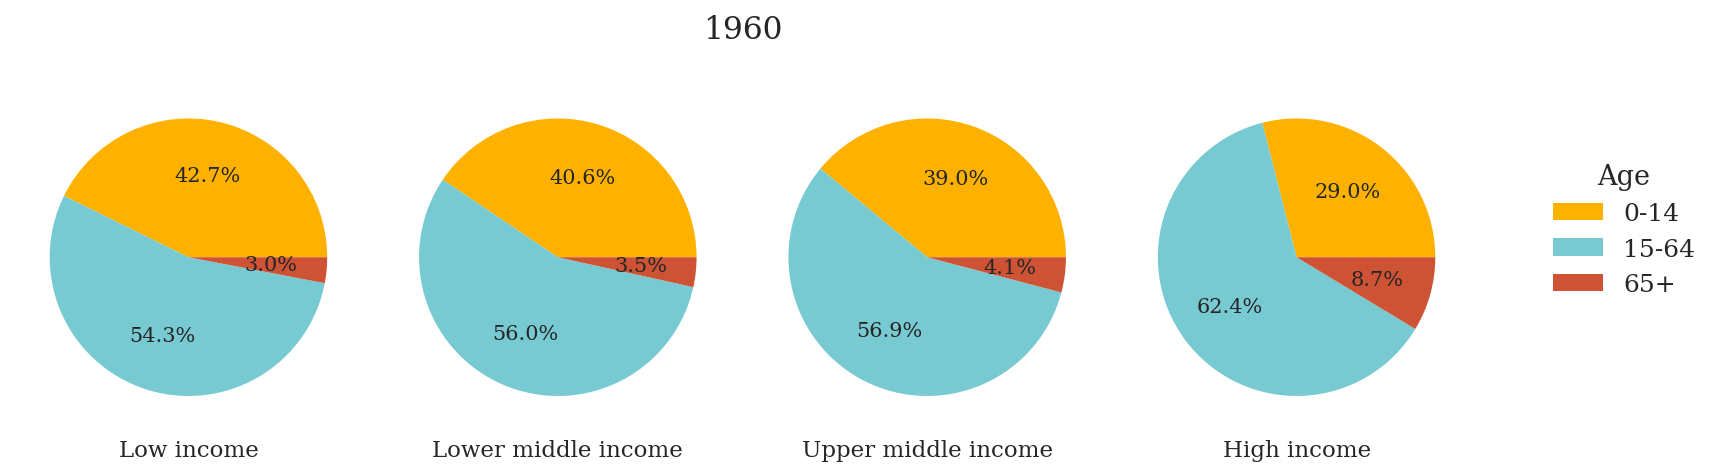

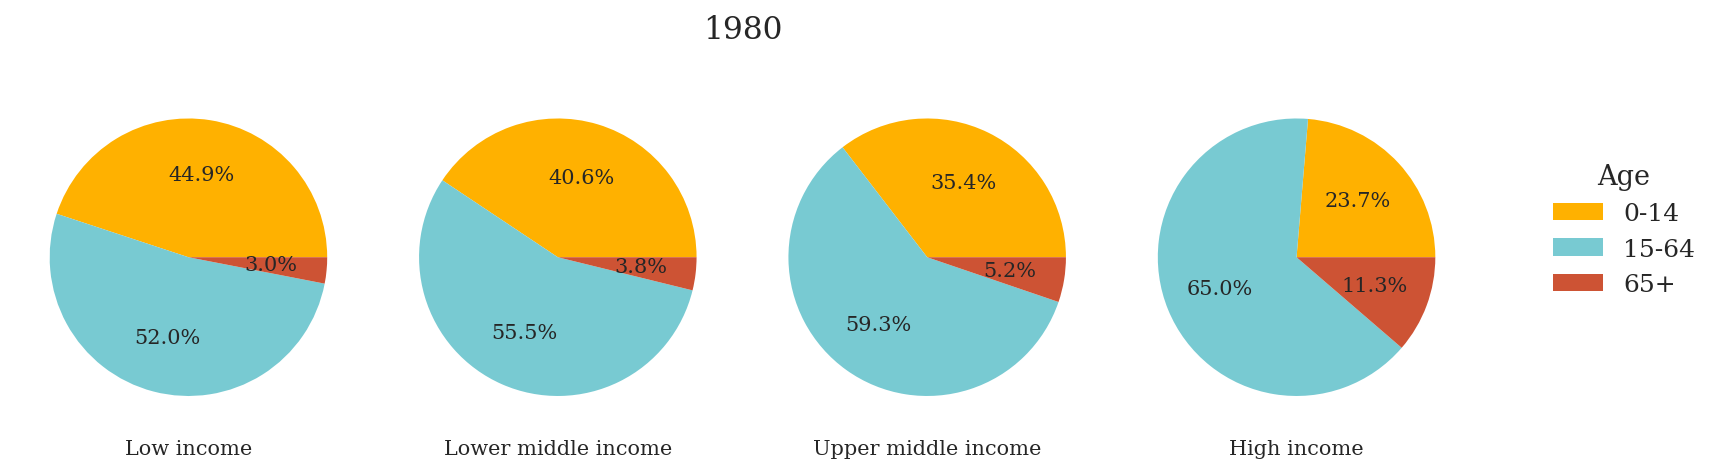

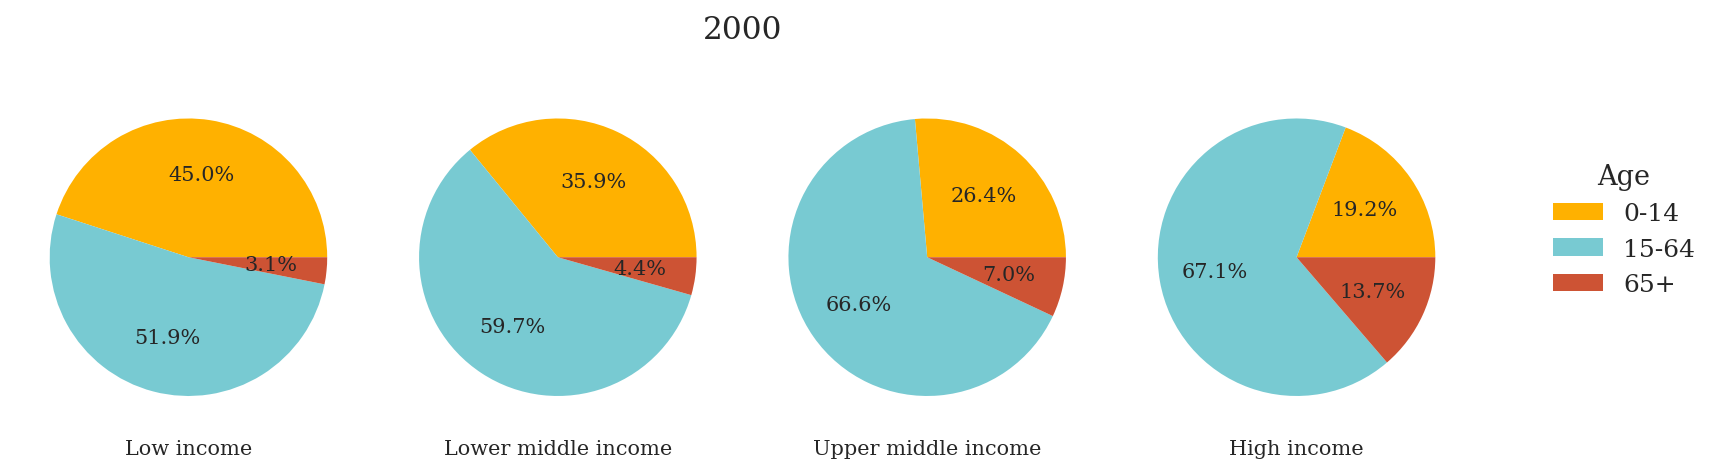

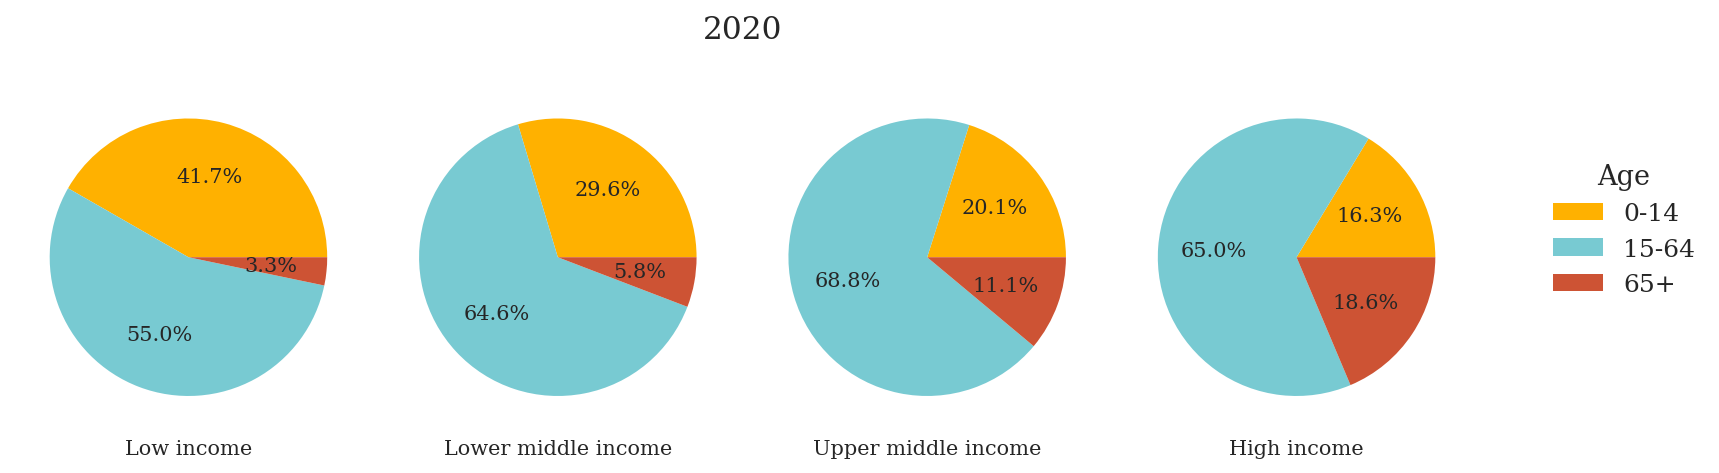

In [35]:
# Plot age distribution pie charts
dfs=[]
for income in ["Low income", "Lower middle income", "Upper middle income", "High income"]:
    df_t = df_i[df_i["Country Name"] == income].reset_index(drop=True)
    df_t = df_t[(df_t["Series Name"].str.startswith("Population ages")) & (~df_t["Series Name"].str.contains("male"))].pivot("Year", columns=["Series Name"], values=["Value"])
    dfs.append(df_t)

for year in df_t.index[::20]:
    fig, ax = plt.subplots(1, 4)
    fig.set_size_inches(10, 3)
    fig.suptitle(f"{year}", fontsize=15)
    plt.rc('font', size=10)
    plt.rc('axes', labelsize=10)
    
    for x, income in enumerate(["Low income", "Lower middle income", "Upper middle income", "High income"]):
        dfs[x].loc[year].plot(kind='pie', ax=ax[x], autopct='%1.1f%%', labels=['', '', ''], colors=['#FFB100', '#78CAD2', '#CD5334'])
        ax[x].set_ylabel('')
        ax[x].set_xlabel(income)

    fig.legend(["0-14", "15-64", "65+"], title="Age", bbox_to_anchor=(1.15, 0.7), title_fontsize=13, fontsize=12)
    plt.tight_layout()
    plt.show()
    plt.close()

As we can see, there is a significant difference between the population distribution by age for different income groups. Countries with low income tend to have more young people and fewer elderly people. However, as income increases, the proportion of children (ages 0-14) decreases and the proportion of elderly people (ages 65+) increases.

Although the distribution hasn't changed much in the low-income countries for the last 60 years, we can see that the proportion of children (ages 0-14) has decreased and the proportion of elderly people (ages 65+) has increased in the other income groups, most significantly in high-income countries.

I will make the conclusions in the respective section. Now, I'll make line plots to see the changes in population distribution by age in the four income groups from 1960 to 2020. We have a general understanding of this from the previous charts.


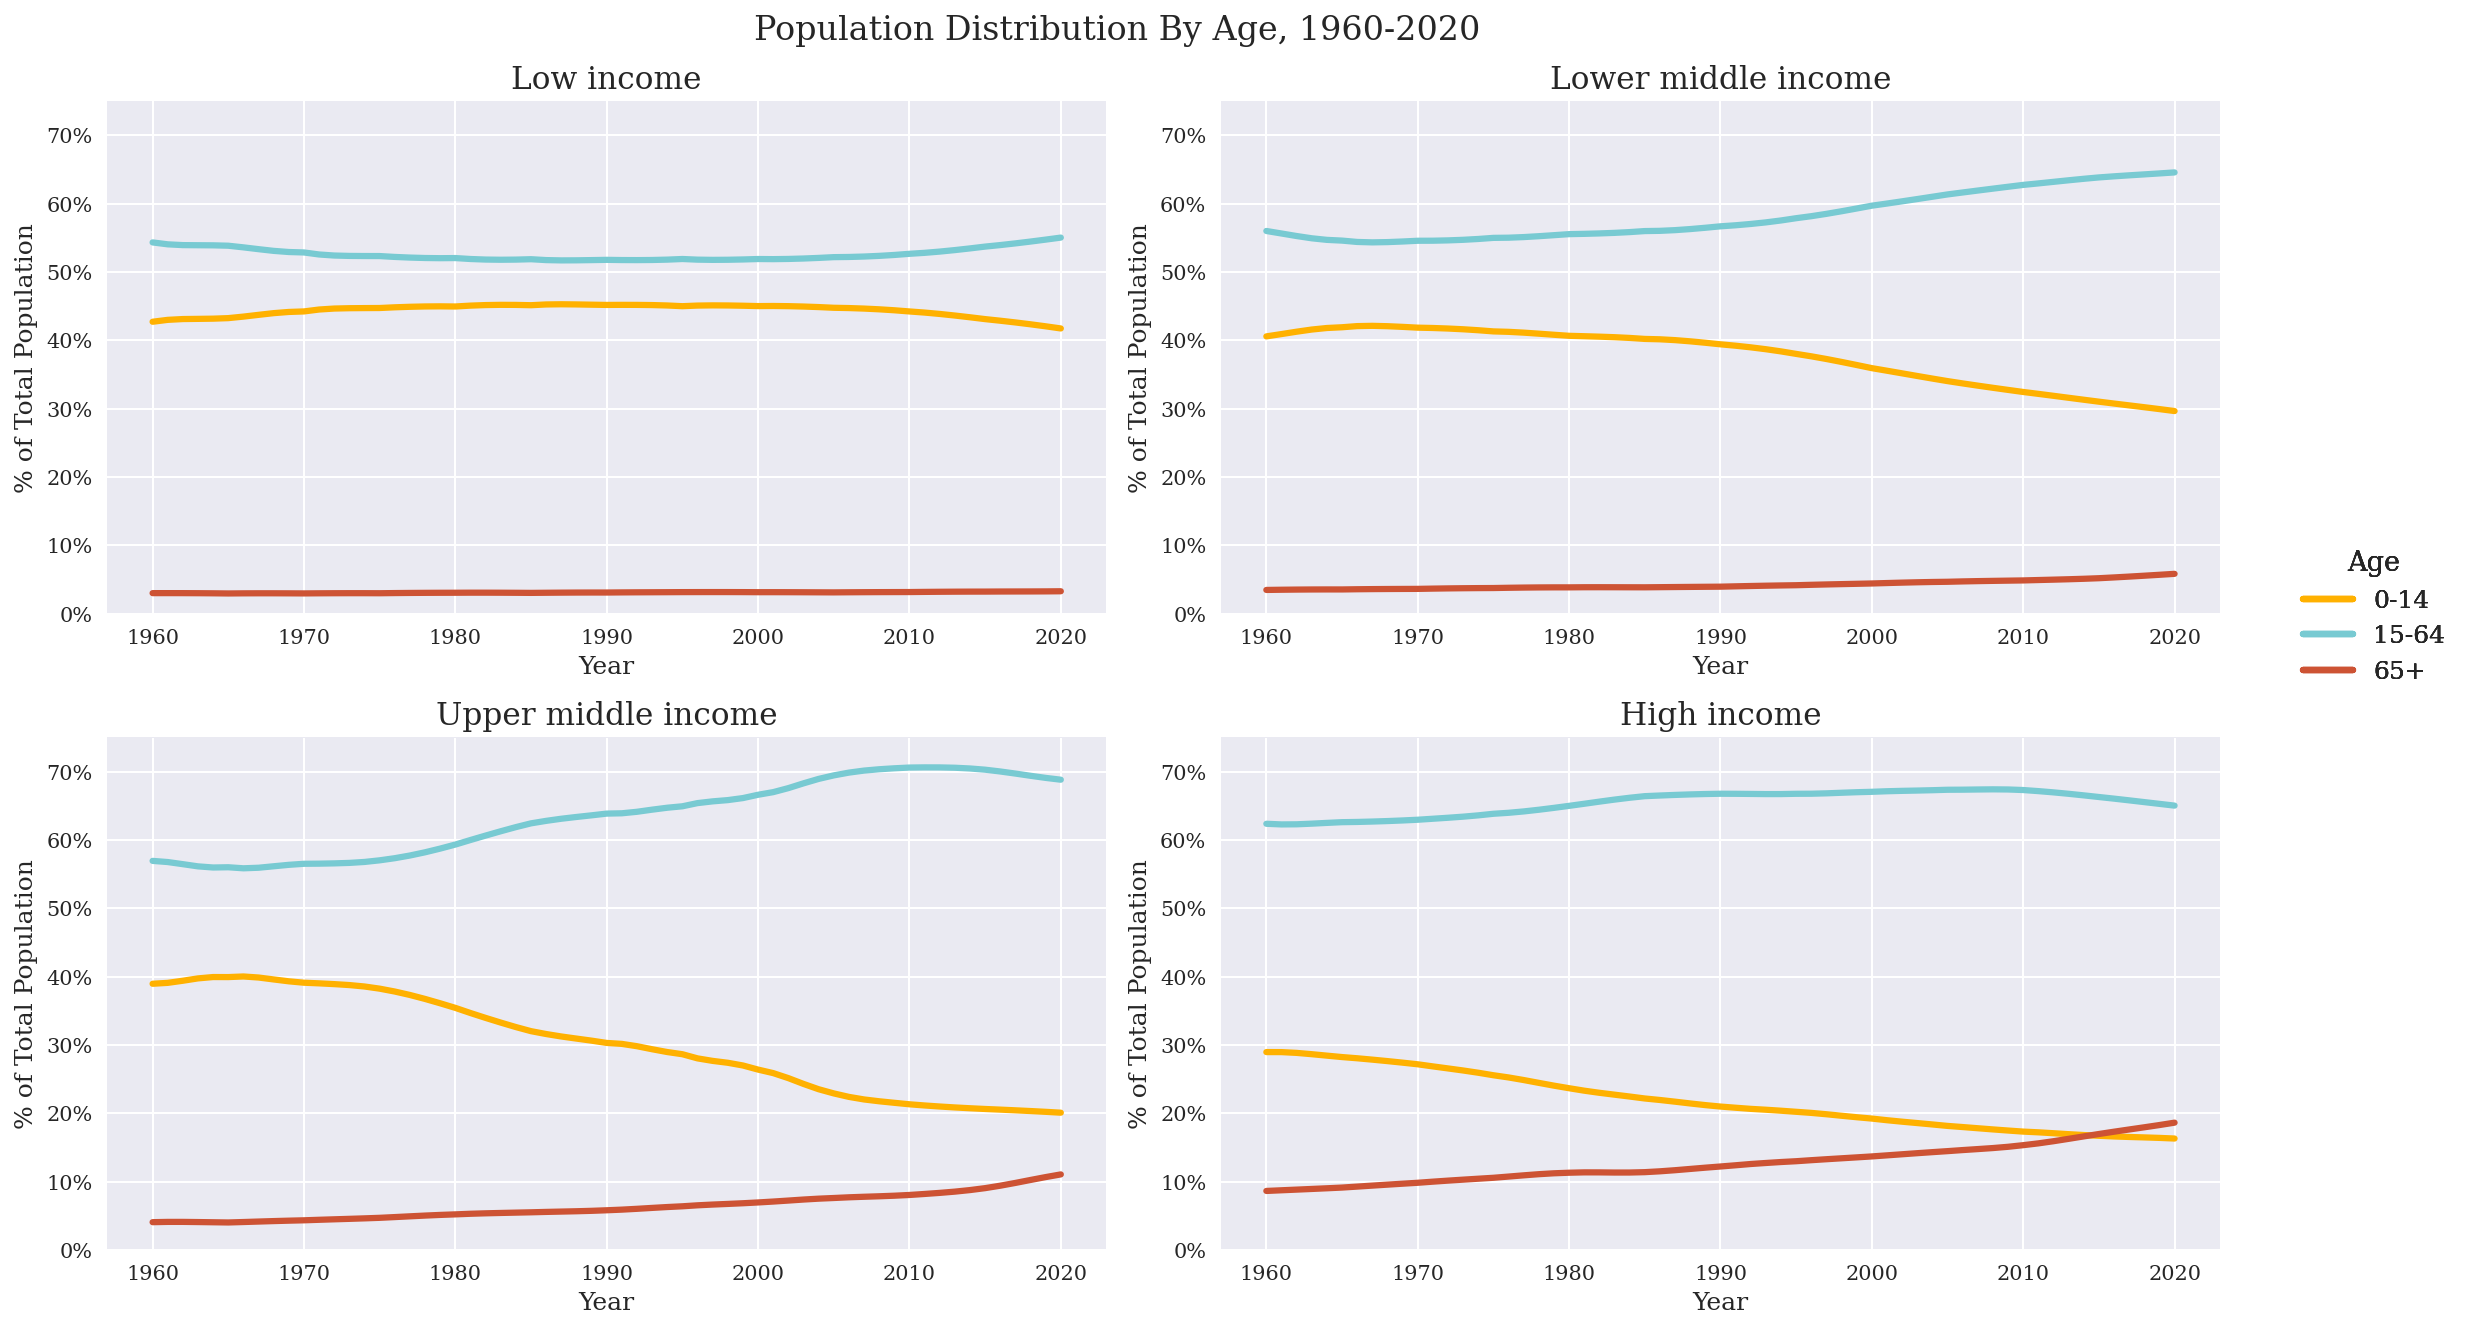

In [36]:
fig, ax = plt.subplots(2,2, figsize=(15, 9))
for x, income in enumerate(["Low income", "Lower middle income", "Upper middle income", "High income"]):
    axis = ax[x//2, x%2]
    plt.rc('axes', labelsize=16)
    for color, col in zip(['#FFB100', '#78CAD2', '#CD5334'], dfs[x].columns):
        axis.plot(dfs[x][col], lw=3, color=color)
        
    fig.legend(["0-14", "15-64", "65+"], title="Age", bbox_to_anchor=(1.1, 0.6), title_fontsize=13, fontsize=12)
    axis.set_xlabel("Year", fontsize=12)
    axis.set_ylabel("% of Total Population",  fontsize=12)
    axis.set_title(f"{income}", fontsize=15)
    axis.set_xticks([str(x) for x in range(1960, 2021, 10)])
    axis.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    axis.set_ylim([0, 75])
    
plt.suptitle("Population Distribution By Age, 1960-2020", fontsize=16)
plt.tight_layout()
plt.show()

The population distribution hasn't changed much in low-income countries. There was only a slight increase in the proportion of children that peaked in 1990 and then decreased back to the 1960 level. In lower-middle- and upper-middle-income countries the proportion of children has decreased significantly (~10% for lower-middle- and ~20% for upper-middle-income), while the proportion of the other two age groups has increased, more significantly in the upper-middle-income countries. In high-income countries, the proportion of people ages 15-64 has increased slightly. The proportion of children has drastically decreased, while the proportion of elderly people has increased. Since around 2005, there were more elderly people than children in countries with high income.

Lastly, I will make population pyramid charts with more age groups to clearly see these differences. I will make one pyramid for each income group, and I will make pyramids for 4 years: 1960, 1980, 2000, and 2020.

In [37]:
incomes = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
y_age = [f"{x}-{x+4}" for x in range(0, 79, 5)] + ["80+"]

for year in df_i.Year.unique()[::20]:

    fig = make_subplots(rows=2, cols=2, subplot_titles=incomes)

    for i, income in enumerate(incomes):
        
        df_t = df_i[df_i["Country Name"] == income].reset_index(drop=True)
        df_m = df_t[(df_t["Series Name"].str.startswith("Population ages")) & (df_t["Series Name"].str.contains(" male"))].pivot("Year", columns=["Series Name"], values=["Value"])
        df_f = df_t[(df_t["Series Name"].str.startswith("Population ages")) & (df_t["Series Name"].str.contains(" female"))].pivot("Year", columns=["Series Name"], values=["Value"])

        x_M = df_m.loc[year].values
        x_F = df_f.loc[year].values * -1

        # Adding Male data to the figure
        fig.add_trace(go.Bar(y=y_age, x=x_M, 
                             name='Male', 
                             orientation='h',
                             legendgroup='group1',
                             marker_color='#636EFA',
                             showlegend=True if i == 0 else False), row=i//2+1, col=i%2+1)

        # Adding Female data to the figure
        fig.add_trace(go.Bar(y=y_age, x=x_F,
                             name='Female', orientation='h',
                             legendgroup='group2',
                             marker_color= '#EF553B',
                             showlegend=True if i == 0 else False), row=i//2+1, col=i%2+1)

        # Updating the layout for our graph
        fig.update_layout(title = f'Population Pyramid, Year {year}',
                         title_font_size = 22, barmode = 'relative',
                         bargap = 0.0, bargroupgap = 0)
        # Update xaxis properties
        fig.update_xaxes(title_text="Population, % of each gender",
                         range=[-18, 18], row=i//2+1, col=i%2+1,
                         tickvals = [-20, -16, -12, -8, -4, 0,
                                     4, 8, 12, 16, 20],
                         ticktext = ['20%', '16%', '12%', '8%', '4%', '0',
                                     '4%', '8%', '12%', '16%', '20%'],
                         title_font_size = 14, title_standoff=2)
        fig.update_yaxes(title_text="Age", title_standoff=2)

        fig.update_layout(margin=dict(l=25, r=25, t=80, b=25))

    fig.show()

The charts for lower-income countries look like pyramids, which means there are more younger people than older. While the charts for the other groups resembled pyramids in the beginning, the lower part of the pyramid is getting smaller and the upper part bigger as time goes on. From this, we can assume that population growth has increased or stayed steady in the countries with lower income and decreased in the countries with higher income, but this will be the topic of the next question.

## Intermediate conclusion

Overall, the visualizations show that the initial assumption that there are more young people in countries with lower income than in countries with the higher income is true. We have also observed that the population distribution by age has changed over time, which resulted in an even less proportion of young people in countries with higher income. The graphs suggest that the birth rate declined in developed countries.

From here, we can assume that population distribution by age, mainly the high proportion of the younger population (which is the group to be provided with primary/secondary education), also affect the literacy rate. However, I think there should be other factors that cause the proportion of children to be higher in some countries. That can as well be the lack of resources, i.e, poverty. In the next part, I will analyze the population growth rate by country.

# Population Growth vs GDP

Now, to understand the population growth rate trends over the world, I will make a choropleth map with population growth rates for 1961 (no data for 1960 since it is the starting year), 1990, and 2020.

In [38]:
# Choropleth map for Population Growth data

for year in [1961, 1990, 2020]:
    # Children proportions
    df_pop_growth = df_melt[(df_melt["Series Name"] == "Population growth (annual %)") & (df_melt["Year"].astype("int") == year)][["Country Name", "Value"]].rename(columns={"Value":"Population Growth"})

    fig = px.choropleth(df_pop_growth, locations='Country Name', locationmode='country names', color='Population Growth',\
                        range_color=[-1, 5], scope='world', hover_name="Country Name",\
                        color_continuous_scale=px.colors.sequential.Viridis,\
                        title=f"Population growth (annual %): {year}")

    fig.show()

As we can see in the maps, in 1961, Kazakhstan and Greenland had large enough population growth rates. On the contrary, the population of China was decreasing. Other than that, Africa, South Asia, and Latin America had higher growth rates, compared to the rest of the world. In 1990, Jordan, Yemen, and Afghanistan had high population growth rates, however, overall the population growth rates decreased. In 2020, the poor regions, mainly Africa and South Asia have higher growth rates. This again seems to line up with the assumption I had initially.

Now, I will plot line plots of the growth rates for different income level groups for the whole period to see how the growth rates changed and how different they are from each other.

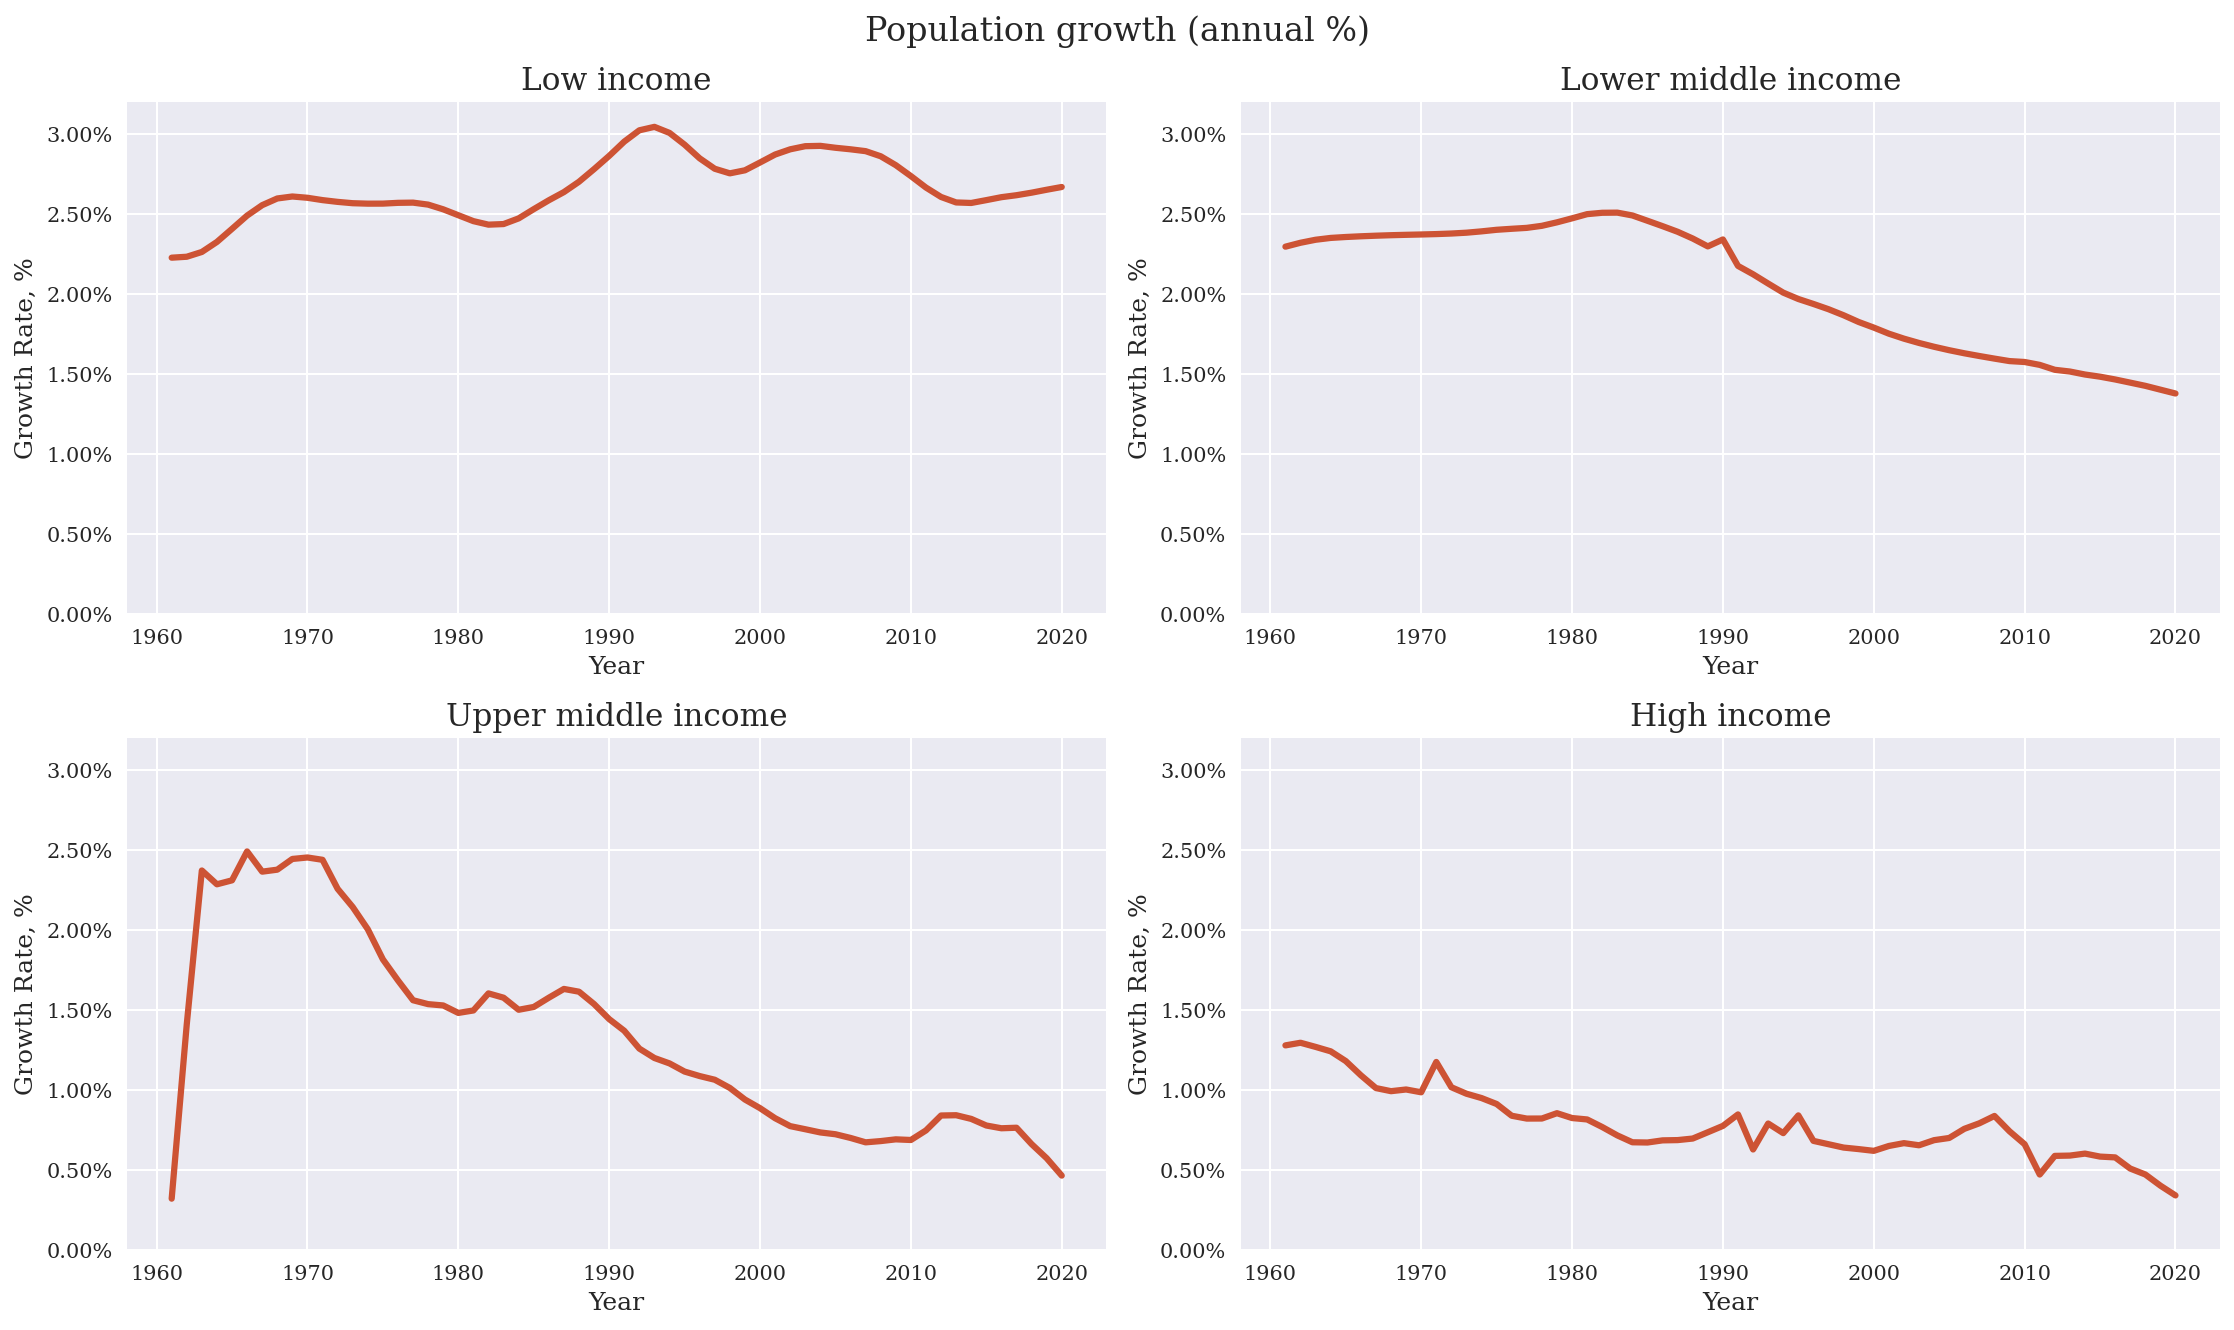

In [39]:
fig, ax = plt.subplots(2,2, figsize=(15, 9))
for x, income in enumerate(["Low income", "Lower middle income", "Upper middle income", "High income"]):
    axis = ax[x//2, x%2]
    plt.rc('axes', labelsize=16)
    to_plot = df_i[(df_i["Country Name"] == income) & (df_i["Series Name"] == "Population growth (annual %)")].pivot("Year", columns=["Series Name"], values=["Value"])
    axis.plot(to_plot, lw=3, color="#CD5334")
        
    axis.set_xlabel("Year", fontsize=12)
    axis.set_ylabel("Growth Rate, %",  fontsize=12)
    axis.set_title(f"{income}", fontsize=15)
    axis.set_xticks([str(x) for x in range(1960, 2021, 10)])
    axis.yaxis.set_major_formatter(mtick.PercentFormatter())
    axis.set_ylim([0, 3.2])
    
plt.suptitle("Population growth (annual %)", fontsize=16)
plt.tight_layout()
plt.show()

As we can see, population growth is significantly higher in low- and lower-middle-income countries. Also, while in the countries with low income, the growth rate has increased over time, in lower-middle-, upper-middle-, and high-income countries the growth rate has decreased. Although the decrease, the rates suggest that in countries with lower income the population growth rate is still higher.

## Intermediate conclusion

The population growth rate is the annual population change, which is the number of births - the number of deaths. So, the number of births is what affects the growth rate the most. This means we can assume that the birth rate is higher in countries with lower income, which indeed is correct. A few possible causes for this that I can think of are:

- Lack of education for girls and women:
 - In countries with higher income, more women get an education than in countries with lower income. As women get an education and pursue a career, they marry late and usually have fewer children, which ultimately results in a decline in the birth rate.


- Lack of information and access to birth control:
 - In poor countries, many people are not educated about birth control. So unplanned pregnancies occur unchecked, which results in a high birth rate.


- Early marriages in some poor countries:
 - In some poor countries, girls are forced to marry at an early age. So women's childbearing years start much earlier, meaning they are likely to have more kids.
 
It seems poverty is correlated with a high population growth rate. Also, poverty is related to lower literacy rates. We can assume that higher population growth can also affect the literacy rate. Next, I will try to find out how much each of the discussed factors affects the literacy rate.

## Multiple regression

Lastly, I will construct a multiple regression model to see how each of the indicators affects the literacy rate. To do so, I will need to prepare the data.

In [40]:
# Literacy Rate and GDP per capita
df_merged.head()

Country Name  Literacy Rate  GDP per capita
0          Afghanistan      31.448851      505.463610
1              Albania      97.411140     5320.975919
2              Algeria      81.407837     3648.263242
3               Angola      66.030113     2292.896478
4  Antigua and Barbuda      98.949997    15684.697080

In [41]:
# Children Proportion
df_children_prop = df_melt[(df_melt["Series Name"] == "Population ages 0-14 (% of total population)") & (df_melt["Year"].astype("int") == 2020)][["Country Name", "Value"]].rename(columns={"Value":"Children Proportion"}).reset_index(drop=True)
df_children_prop.head()

Country Name  Children Proportion
0     Afghanistan            41.822601
1         Albania            17.235858
2         Algeria            30.783516
3  American Samoa                  NaN
4         Andorra                  NaN

In [42]:
# Population Growth
df_pop_growth = df_melt[(df_melt["Series Name"] == "Population growth (annual %)") & (df_melt["Year"].astype("int") == 2020)][["Country Name", "Value"]].rename(columns={"Value":"Population Growth"}).reset_index(drop=True)
df_pop_growth.head()

Country Name  Population Growth
0     Afghanistan           2.303812
1         Albania          -0.577942
2         Algeria           1.836534
3  American Samoa          -0.208128
4         Andorra           0.154134

I will need to merge the dataframes into a single dataframe so that I can use it for the multiple regression model.

In [43]:
# Merged data for the regression model
reg_data = df_merged.merge(df_children_prop, on="Country Name").merge(df_pop_growth, on="Country Name")
reg_data.head()

Country Name  Literacy Rate  GDP per capita  Children Proportion  \
0          Afghanistan      31.448851      505.463610            41.822601   
1              Albania      97.411140     5320.975919            17.235858   
2              Algeria      81.407837     3648.263242            30.783516   
3               Angola      66.030113     2292.896478            46.395362   
4  Antigua and Barbuda      98.949997    15684.697080            21.850524   

   Population Growth  
0           2.303812  
1          -0.577942  
2           1.836534  
3           3.218530  
4           0.833667

Now, I will make scatterplots to understand how each of the three indicators is related to the `Literacy Rate`.

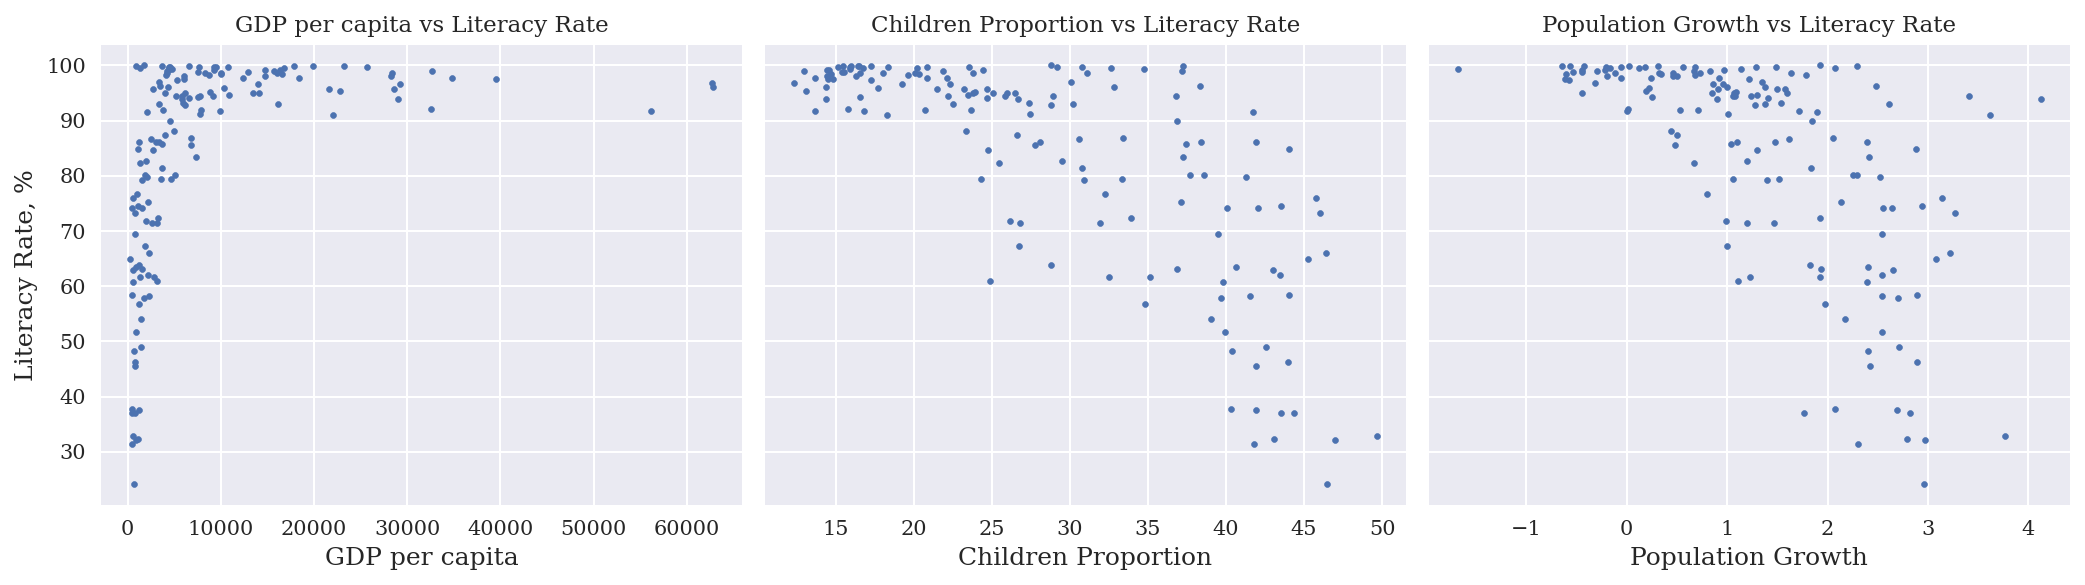

In [44]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(14, 4))

for x, col in enumerate(["GDP per capita", "Children Proportion", "Population Growth"]):
    ax[x].scatter(col, "Literacy Rate", data=reg_data, s=8)
    ax[x].set_title(f"{col} vs Literacy Rate")
    ax[x].set_xlabel(col, fontsize=12)
    
ax[0].set_ylabel("Literacy Rate, %", fontsize=12)
fig.tight_layout()
plt.show()

We've found out that the relationship between GDP per capita and Literacy Rate is close to logarithmic. Now, we need to understand the relationships between the other two pairs. It looks like the relationship between Population growth and Literacy Rate is close to linear, while the relationship between Children Proportion and Literacy Rate can be either linear or quadratic. I will make two regression models, one with linear and the other with quadratic trendline, and take the one that has a greater R-Squared.

In [45]:
print("Linear\n")
print(smf.ols(formula = 'Q("Literacy Rate") ~ Q("Children Proportion")', data=reg_data).fit().summary())
print("\n" + "*"*120)
print("\nQuadratic\n")
print(smf.ols(formula = 'Q("Literacy Rate") ~ np.power(Q("Children Proportion"),2)', data=reg_data).fit().summary())

Linear

                            OLS Regression Results                            
Dep. Variable:     Q("Literacy Rate")   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     175.2
Date:                Sun, 01 May 2022   Prob (F-statistic):           1.14e-26
Time:                        21:32:02   Log-Likelihood:                -580.28
No. Observations:                 146   AIC:                             1165.
Df Residuals:                     144   BIC:                             1171.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept       

The R-Squared is somewhat higher for the quadratic regression model. So we will take that for the multiple regression model.

Now we can construct a multiple regression model and see how much each indicator contributes to the model. The formula will be

`Literacy Rate` = $log$(`GDP per capita`) + `Children Proportion`$^2$ + `Population Growth`

In [46]:
m = smf.ols(formula = ' Q("Literacy Rate") ~ np.log(Q("GDP per capita")) + np.power(Q("Children Proportion"), 2) + Q("Population Growth")', data=reg_data).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q("Literacy Rate")   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     81.04
Date:                Sun, 01 May 2022   Prob (F-statistic):           1.31e-30
Time:                        21:32:02   Log-Likelihood:                -565.56
No. Observations:                 146   AIC:                             1139.
Df Residuals:                     142   BIC:                             1151.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                46.7592     14.602      3.202      0.002      17.894      75.624
np.log(Q("GDP per capita"))               5.9388      1.464      4.057      0.000       3.045       8.832
np.power(Q("Children Proportion"), 2)    -0.0108      0.004     -2.684      0.008      -0.019      -0.003
Q("Population Growth")                   -2.3347      1.495     -1.562      0.121      -5.290       0.620
==============================================================================
Omnibus:                        1.755   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.318
Skew:                          -0.135   Prob(JB):                        0.517
Kurtosis:                       3.379   Cond. No.                     1.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Intermediate conclusion
The model summary suggests that there might be multicollinearity, which was expected. Anyways, the R-Squared is 0.66, which is fairly good. Now, if we have a look at the coefficients of the variables, we see that the P-values are small enough.

Interpretation of the coefficients:
- A percentage increase in `GDP per capita` results in a 0.075 unit increase in `Literacy Rate`.
- A unit increase in `Children Proportion` results in a 0.01$^2$ unit decrease in `Literacy Rate`.
- A unit increase in `Population Growth` results in a 2.33 unit decrease in `Literacy Rate`.
    
*Note*: However, since the variables themselves influence one another, the coefficients do not accurately show how each variable individually affects the `Literacy Rate`. So, each of the interpretations assumes indicators other than the specified remain constant.

Nonetheless, we found that the coefficient for `GDP per capita` is positive, and the coefficients for the other two indicators, `Children Proportion` and `Population Growth`, are negative. This can mean that higher `GDP per capita` is correlated with a higher `Literacy Rate`, but a higher `Children Proportion` or `Population Growth` is correlated with a lower `Literacy Rate`.


I will finish the analysis by making scatterplots for each pair of indicators.

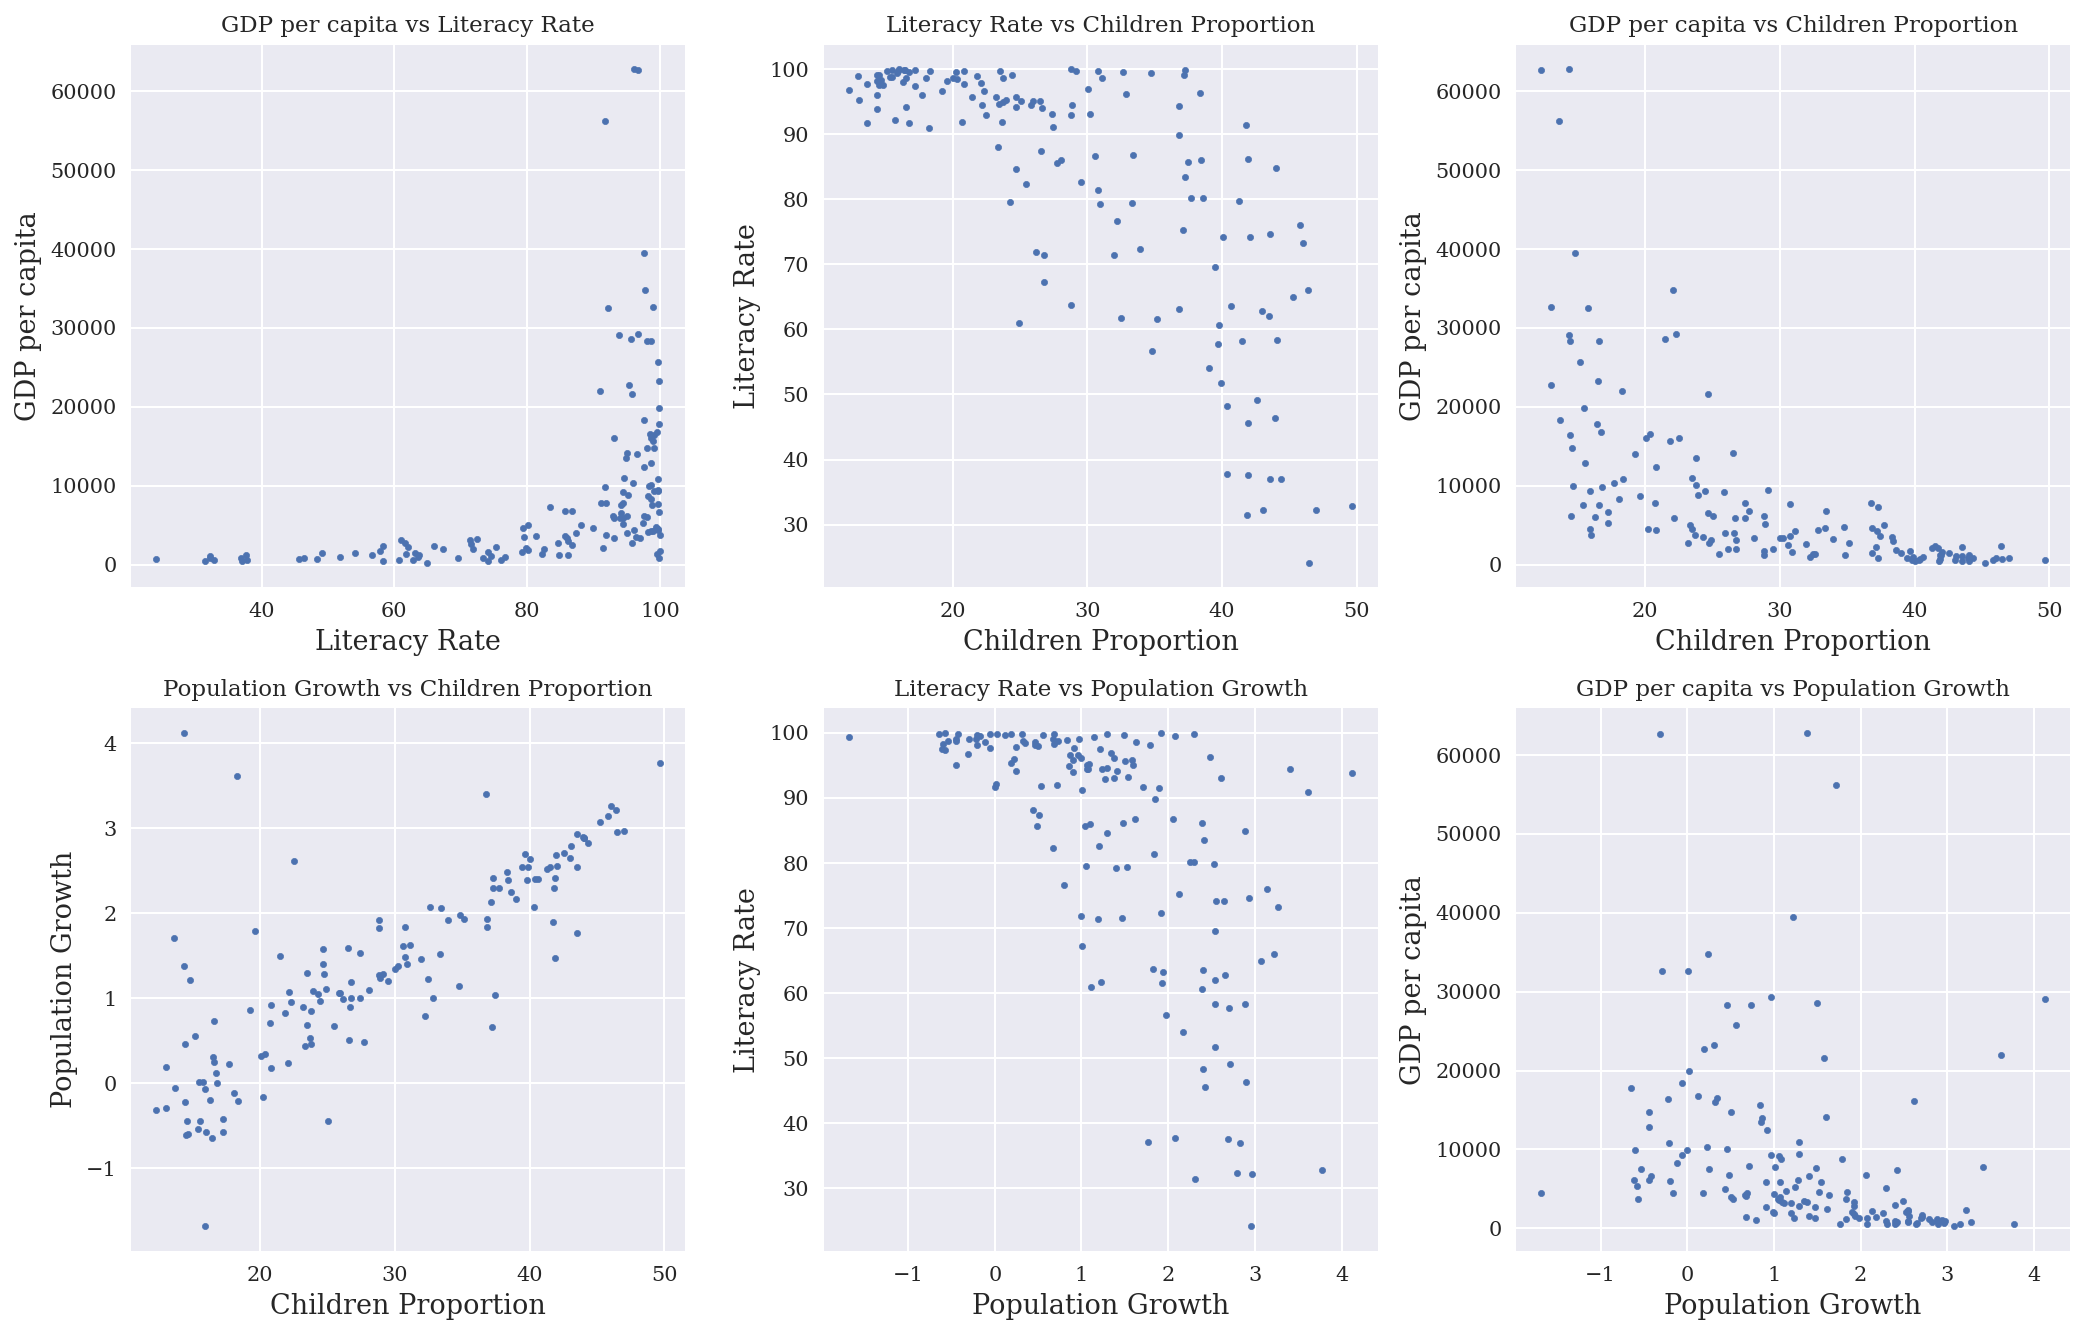

In [47]:
fig, ax = plt.subplots(2, 3, figsize=(14, 9))
indicators = ["Children Proportion", "Population Growth", "Literacy Rate", "GDP per capita"]

for x, pair in enumerate(list(set(list(itertools.combinations(indicators, 2))))):
        i = x // 3
        j = x % 3
        
        ax[i, j].scatter(pair[0], pair[1], data=reg_data, s=9)
        ax[i, j].set_title(f"{pair[1]} vs {pair[0]}")
        
        ax[i, j].set_xlabel(pair[0], fontsize=13)
        ax[i, j].set_ylabel(pair[1], fontsize=13)
    
fig.tight_layout()
plt.show()

As we can see, there is some sort of correlation between indicators in each pair. While this does not suggest any causation, we can use common sense to try to find which indicators might be influencing to the other indicators. 

Now taking into account all the findings, I will try to make a diagram that might closely show the relationship between the indicators.<br><br>

<div>
    <img src="https://i.ibb.co/T4ybqSP/project-01.png" alt="project-01" border="0" width="400"/>
</div>

Clearly, GDP per capita is correlated with all three indicators. We have reached this conclusion through the analysis. Next, I will talk about the reasons that I think can cause the correlation:

GDP per capita can influence Population Growth because
- In poor countries, many people are not educated about birth control. So unplanned pregnancies occur unchecked, which results in a high birth rate.
- In some poor countries, girls are forced to marry at an early age. So, women's childbearing years start much earlier, meaning they are likely to have more kids.
- In countries with higher income women are more likely to pursue a career, which can result in having children at an older age. So, women's childbearing years start much later in high-income countries as compared to low-income countries.


GDP per capita can influence Child Proportion because
- Since GDP per capita can influence Population Growth, it can consequently influence Children Proportion.

GDP per capita can influence Literacy Rate because
- Educating the population can cause a huge amount of resources, which low-income countries lack. This can be a reason for low literacy rates in low-income countries.
- In some poor countries girls and women do not receive education because of old traditions. This can be another reason for low literacy rates.

Population Growth can influence Children Proportion because
- The higher the population growth is, the higher the proportion of children is.

Population Growth and Children Proportion can influence Literacy Rate because
- The more children there are, the more resources are needed to educate them. Because of the lack of resources and a high proportion of children in low-income countries, it is hard to provide them with education.

Literacy Rate can influence Population Growth and Children Proportion because
- In countries with higher income, more women get an education than in countries with lower income. As women get an education and pursue a career, they marry late and usually have fewer children, which ultimately results in a decline in the birth rate.

As we can see the indicators influence one another. Since there can be some circular relationship, it is hard to say exactly what causes what. However, the general trends are obvious.